In [181]:
import pandas as pd

In [200]:
#df = pd.read_csv('../Matrix-Chain-4/logs/event_log-1.csv')
df = pd.read_csv('../Matrix-Chain-4/logs/event_log-10.csv')
#df = pd.read_csv('../Matrix-Chain-4/variants-linnea/log.txt',  sep=';')

In [201]:
df

,case:concept:name,concept:name,time:start,time:end,case:dims,case:threads
0,V5R0,"matmul(A,B)",1.652894e+09,1.652894e+09,"[300, 4000, 30, 320, 3000]",4
1,V5R0,"matmul(C,D)",1.652894e+09,1.652894e+09,"[300, 4000, 30, 320, 3000]",4
2,V5R0,"matmul(T_AB,T_CD)",1.652894e+09,1.652894e+09,"[300, 4000, 30, 320, 3000]",4
3,V6R0,"matmul(C,D)",1.652894e+09,1.652894e+09,"[300, 4000, 30, 320, 3000]",4
4,V6R0,"matmul(A,B)",1.652894e+09,1.652894e+09,"[300, 4000, 30, 320, 3000]",4
5,V6R0,"matmul(T_AB,T_CD)",1.652894e+09,1.652894e+09,"[300, 4000, 30, 320, 3000]",4
6,V4R0,"matmul(C,D)",1.652894e+09,1.652894e+09,"[300, 4000, 30, 320, 3000]",4
7,V4R0,"matmul(B,T_CD)",1.652894e+09,1.652894e+09,"[300, 4000, 30, 320, 3000]",4
8,V4R0,"matmul(A,T_BCD)",1.652894e+09,1.652894e+09,"[300, 4000, 30, 320, 3000]",4
9,V3R0,"matmul(B,C)",1.652894e+09,1.652894e+09,"[300, 4000, 30, 320, 3000]",4


### Convert. CSV to XES

In [202]:
import pm4py
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter

In [203]:
log_csv = dataframe_utils.convert_timestamp_columns_in_df(df)
log_csv = log_csv.sort_values('time:end')
event_log = log_converter.apply(log_csv)

In [204]:
pd.DataFrame(event_log[0])

,concept:name,time:end,time:start
0,"matmul(A,B)",1.652894e+09,1.652894e+09
1,"matmul(C,D)",1.652894e+09,1.652894e+09
2,"matmul(T_AB,T_CD)",1.652894e+09,1.652894e+09


In [205]:
event_log[0].attributes

{'concept:name': 'V5R0', 'dims': '[300, 4000, 30, 320, 3000]', 'threads': 4}

### Overview

In [206]:
from pm4py.statistics.traces.generic.log import case_statistics

In [207]:
variants_count = case_statistics.get_variant_statistics(event_log)

In [208]:
variants_count

[{'variant': 'matmul(C,D),matmul(B,T_CD),matmul(A,T_BCD)', 'count': 1},
 {'variant': 'matmul(C,D),matmul(A,B),matmul(T_AB,T_CD)', 'count': 1},
 {'variant': 'matmul(B,C),matmul(T_BC,D),matmul(A,T_BCD)', 'count': 1},
 {'variant': 'matmul(B,C),matmul(A,T_BC),matmul(T_ABC,D)', 'count': 1},
 {'variant': 'matmul(A,B),matmul(T_AB,C),matmul(T_ABC,D)', 'count': 1},
 {'variant': 'matmul(A,B),matmul(C,D),matmul(T_AB,T_CD)', 'count': 1}]

### Process discovery

### DFG

In [209]:
from pm4py.visualization.dfg import visualizer as dfg_visualizer

In [210]:
dfg, sa, ea = pm4py.discover_directly_follows_graph(event_log)

In [211]:
gviz = dfg_visualizer.apply(dfg)

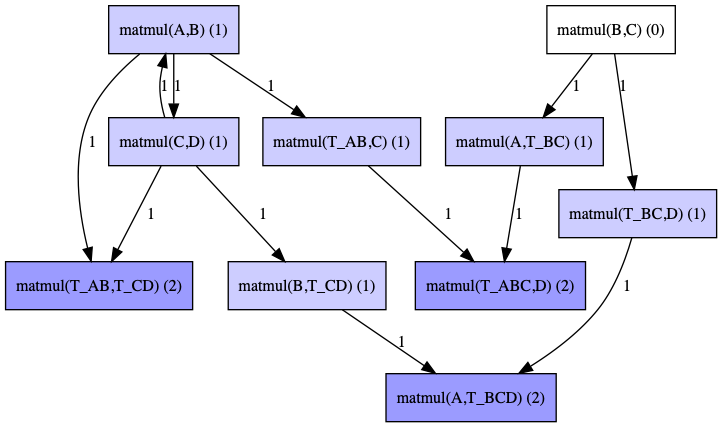

In [212]:
dfg_visualizer.view(gviz)

### Petri net (Hand-model)

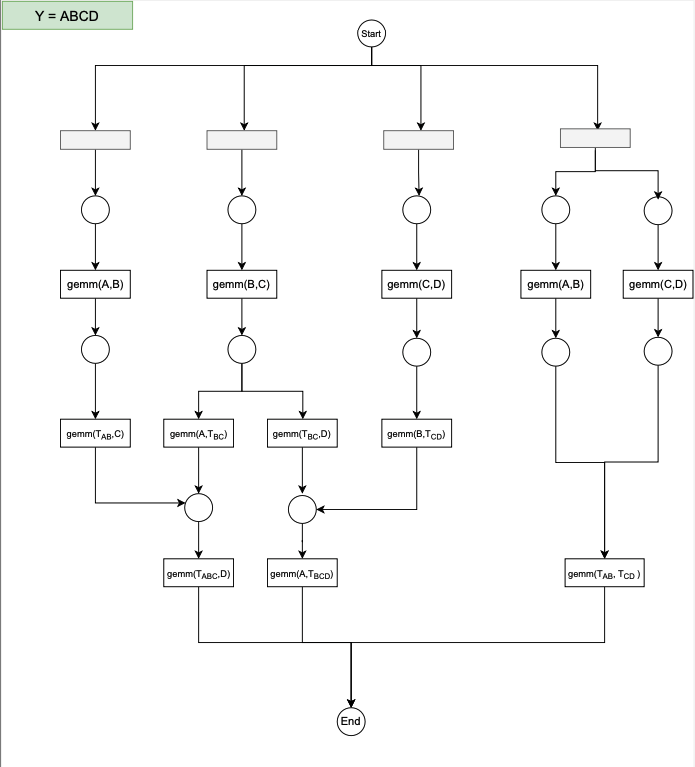

In [213]:
from IPython.display import Image
Image(filename='petrinet.png') 

#### Alpha miner

In [214]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

In [215]:
net, initial_marking, final_marking = alpha_miner.apply(event_log)

In [216]:
gviz = pn_visualizer.apply(net, initial_marking, final_marking)

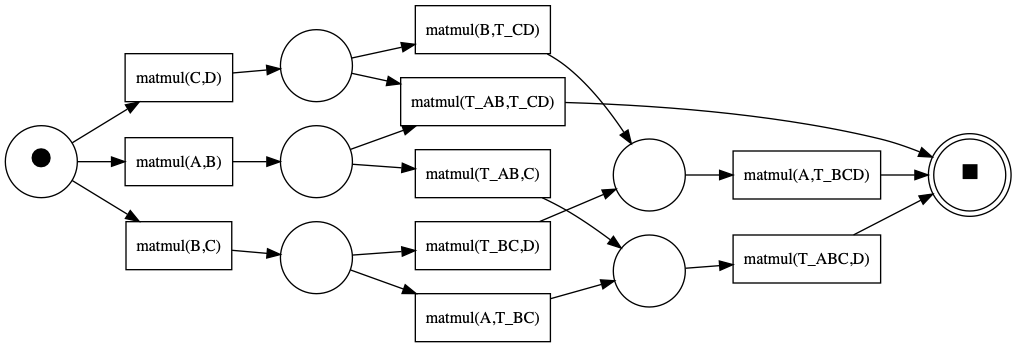

In [217]:
pn_visualizer.view(gviz)

### Transition system

In [178]:
from pm4py.objects.petri import reachability_graph
from pm4py.visualization.transition_system import visualizer as ts_visualizer

In [179]:
ts = reachability_graph.construct_reachability_graph(net, initial_marking)

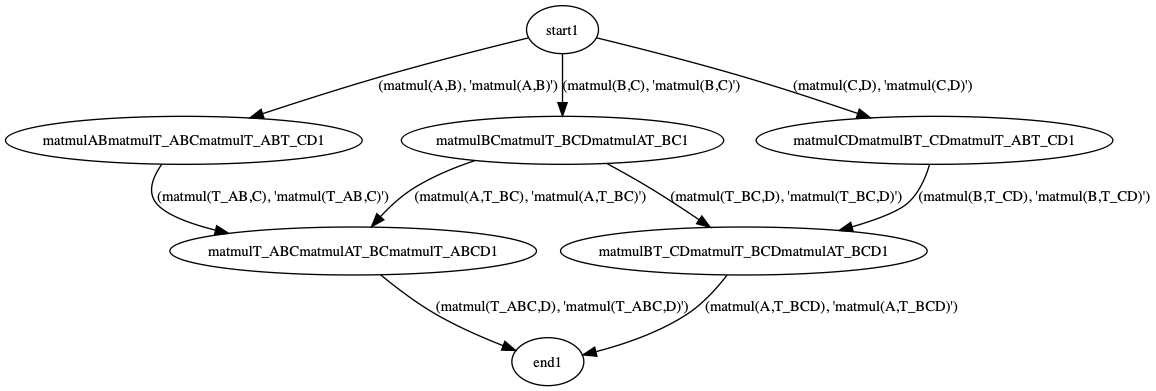

In [180]:
gviz = ts_visualizer.apply(ts)
ts_visualizer.view(gviz)

### Heuristic Miner

In [24]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

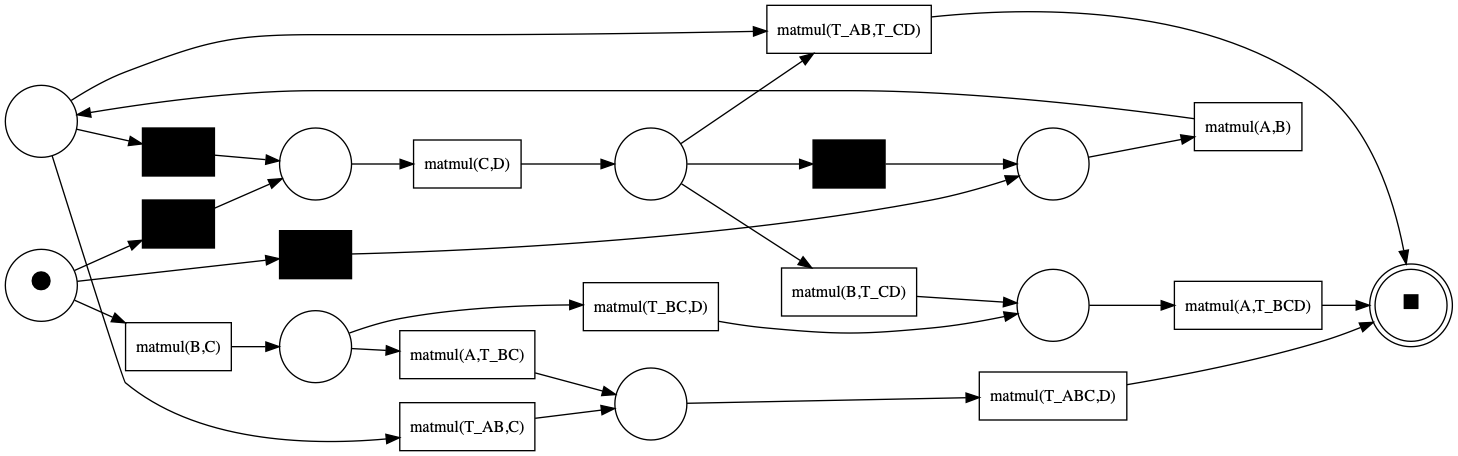

In [25]:
net, im, fm = heuristics_miner.apply(event_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.0})

gviz = pn_visualizer.apply(net,im,fm)
pn_visualizer.view(gviz)

#### Transition system

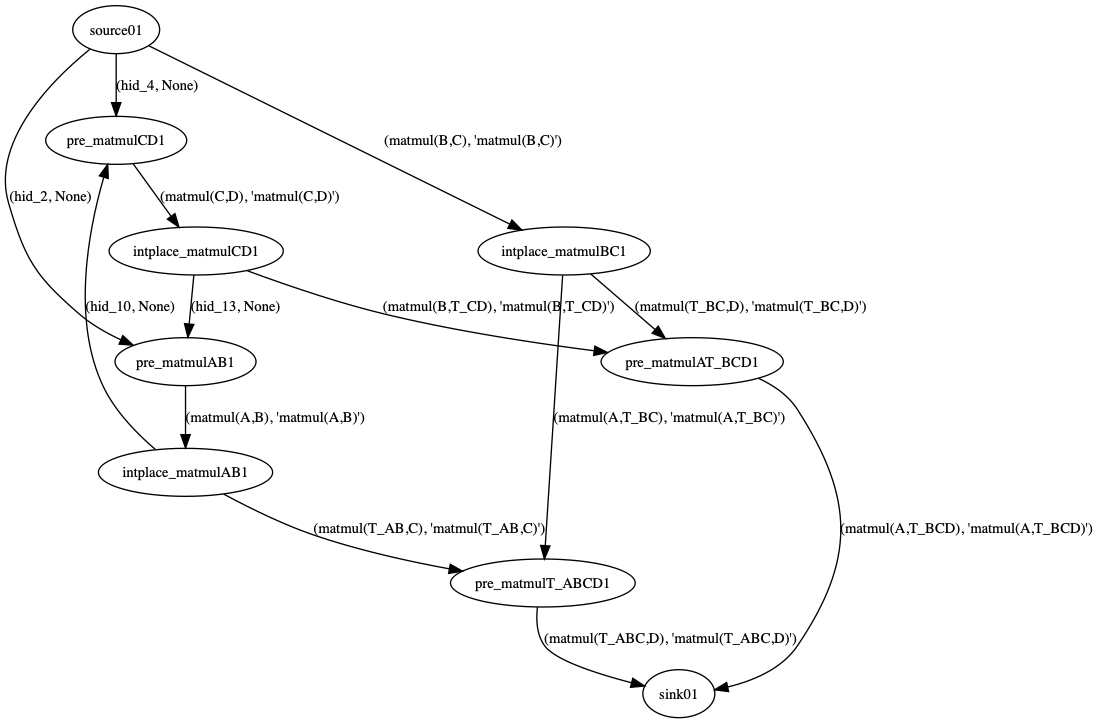

In [27]:
ts = reachability_graph.construct_reachability_graph(net, im)
gviz = ts_visualizer.apply(ts)
ts_visualizer.view(gviz)

### Inductive Miner

In [49]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

In [50]:
net, initial_marking, final_marking = inductive_miner.apply(event_log)

In [51]:
gviz = pn_visualizer.apply(net, initial_marking, final_marking)

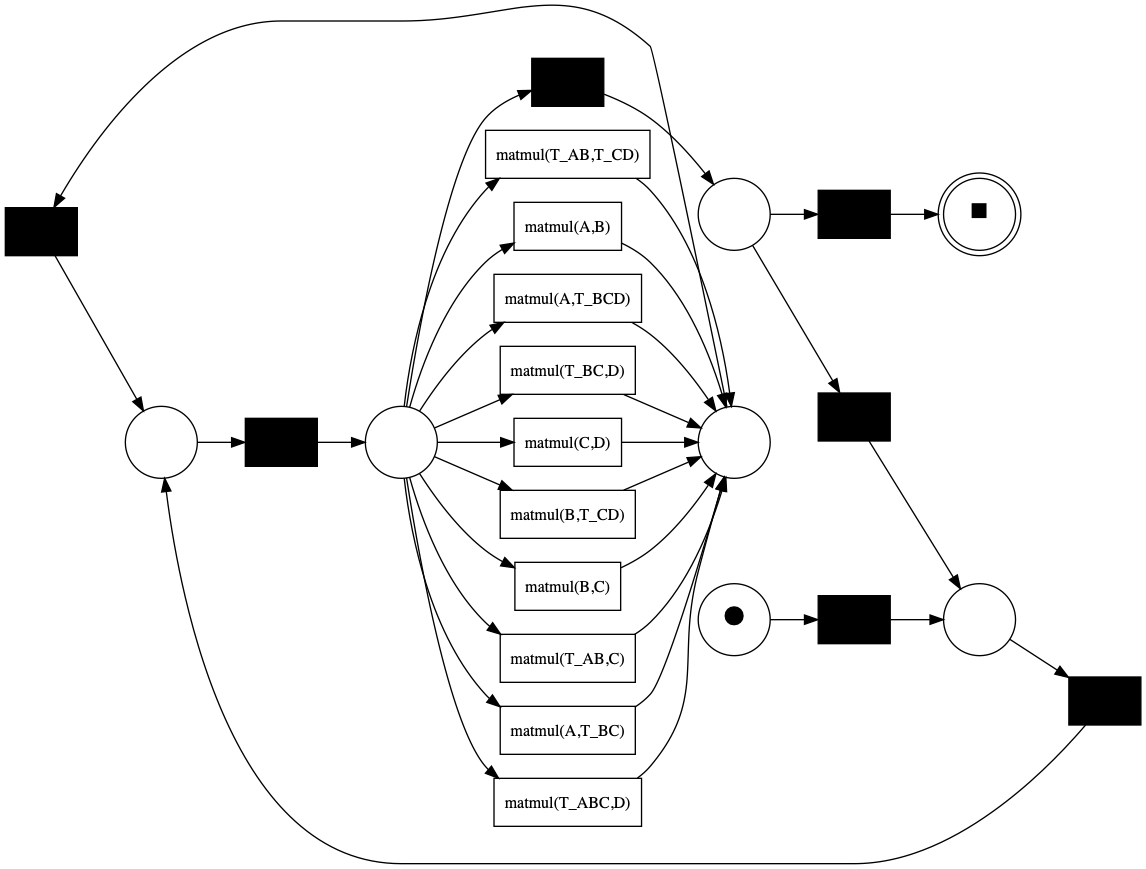

In [52]:
pn_visualizer.view(gviz)

### Filtering

In [58]:
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.objects.log.util.log import get_trace_variants

In [67]:
filtered_events = ['matmul(C,D)',]

In [68]:
events_variants = get_trace_variants(event_log)

In [69]:
filter_variants = []
for variant in events_variants[0]:
    for kernel in filtered_events:
        if kernel not in variant:
            filter_variants.append(",".join(variant))

In [70]:
filter_variants

['matmul(B,C),matmul(T_BC,D),matmul(A,T_BCD)',
 'matmul(B,C),matmul(A,T_BC),matmul(T_ABC,D)',
 'matmul(A,B),matmul(T_AB,C),matmul(T_ABC,D)']

In [71]:
filtered_log = variants_filter.apply(event_log, filter_variants)

In [72]:
variants_count = case_statistics.get_variant_statistics(filtered_log)
variants_count

[{'variant': 'matmul(B,C),matmul(T_BC,D),matmul(A,T_BCD)', 'count': 1},
 {'variant': 'matmul(B,C),matmul(A,T_BC),matmul(T_ABC,D)', 'count': 1},
 {'variant': 'matmul(A,B),matmul(T_AB,C),matmul(T_ABC,D)', 'count': 1}]

#### Alpha miner

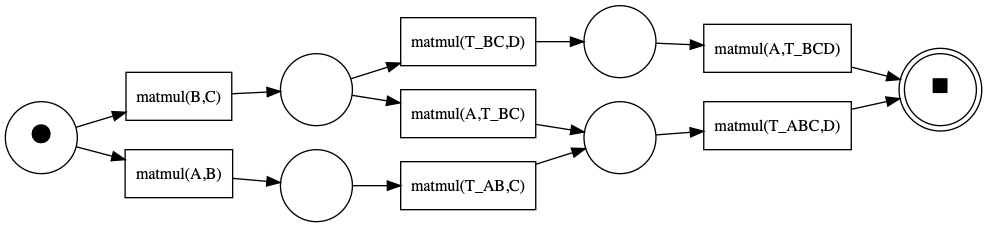

In [73]:
net, initial_marking, final_marking = alpha_miner.apply(filtered_log)
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

#### Transition system

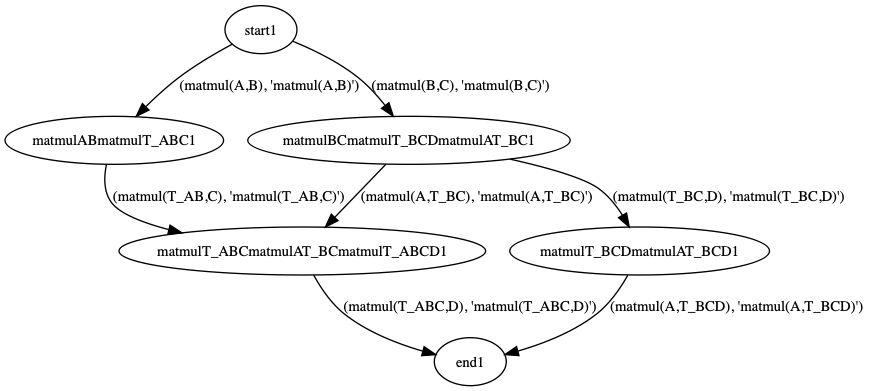

In [74]:
ts = reachability_graph.construct_reachability_graph(net, initial_marking)
gviz = ts_visualizer.apply(ts)
ts_visualizer.view(gviz)